# **Medidas estadisticas Numpy**

In [ ]:
import numpy as np
from scipy import stats

import numpy as np

# Datos
datos = np.array([4, 49, 19, 4, 14, 20, 17, 50, 4, 20])

# Media
media = np.mean(datos)
print("Media:", media)

# Mediana
mediana = np.median(datos)
print("Mediana:", mediana)

# Desviación estándar
desviacion_estandar = np.std(datos)
print("Desviación estándar:", desviacion_estandar)

# Moda
moda = stats.mode(datos)
print("Moda:", moda.mode)

Media: 20.1
Mediana: 18.0
Desviación estándar: 15.984054554461457
Moda: 4


# **Medidas de Dispersión con Numpy**

In [ ]:
import numpy as np

# Contexto: levantamiento de pesas
pesos = [5, 15, 25, 35, 40, 55, 80, 90, 170]

print("Rango:", np.max(pesos) - np.min(pesos))

print("Varianza poblacional:", np.var(pesos))
print("Varianza muestral:", np.var(pesos, ddof=1))

print("Desviación estándar poblacional:", np.std(pesos))
print("Desviación estándar muestral:", np.std(pesos, ddof=1))

#Cálculo del rango intercuartílico
Q1 = np.percentile(pesos, 25)
Q3 = np.percentile(pesos, 75)
print("Rango intercuartílico:", Q3 - Q1)

Rango: 165
Varianza poblacional: 2295.0617283950614
Varianza muestral: 2581.9444444444443
Desviación estándar poblacional: 47.90680252735577
Desviación estándar muestral: 50.812837398087154
Rango intercuartílico: 55.0


# **Actividad 1 - Scipy**

In [ ]:
# Series de tiempo (Lineplot)
import pandas as pd
df=pd.read_csv('accidents.csv',delimiter=";")
type(df)

pandas.core.frame.DataFrame

In [ ]:
print(df.shape)
df.head()

(238522, 24)


,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,ON STREET NAME,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,09/26/2018,12:12,BRONX,10454.0,40.808987,-73.911316,NaN,0,0,0,...,NaN,NaN,NaN,NaN,3988123,Sedan,NaN,NaN,NaN,NaN
1,09/25/2018,16:30,BROOKLYN,11236.0,40.636005,-73.912510,FLATLANDS AVENUE,1,0,0,...,NaN,NaN,NaN,NaN,3987962,Sedan,NaN,NaN,NaN,NaN
2,08/22/2019,19:30,QUEENS,11101.0,40.755490,-73.939530,NaN,0,0,0,...,NaN,NaN,NaN,NaN,4193132,Sedan,NaN,NaN,NaN,NaN
3,09/23/2018,13:10,QUEENS,11367.0,NaN,NaN,MAIN STREET,0,0,1,...,Unspecified,NaN,NaN,NaN,3985962,Bike,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
4,08/20/2019,22:40,BRONX,10468.0,40.868336,-73.901270,NaN,0,0,0,...,Unspecified,NaN,NaN,NaN,4192111,Sedan,Sedan,NaN,NaN,NaN


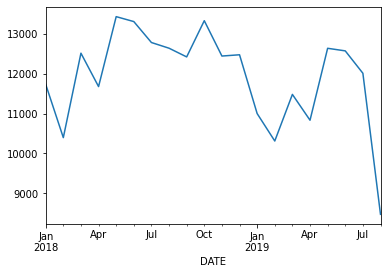

In [ ]:
#Agrupe los datos disponibles mensualmente y genere un line plot de accidentes a lo largo del tiempo.
#¿Ha aumentado el número de accidentes durante el último año y medio?

df['DATE']=pd.to_datetime(df['DATE'])
monthly_accidents =df.groupby(df['DATE'].dt.to_period('M')).size()
monthly_accidents.plot.line()

# **Medidas de tendencia central**



**Media**
$$\bar{x} =\frac{\sum_{i=1}^n x_i}{n}$$

Para el caso de datos discretos agrupados:

$$\bar{x} =\sum_j x_j fr(x_j)$$
Para datos agrupados en clases, la media se calcula suponiendo que todos los datos de cada clase son idénticos al centro de la clase, con lo que,
llamando mj a estos valores centrales y fr (mj) a la frecuencia relativa de la
clase j, la fórmula se reduce a:
$$\bar{x} =\sum_j m_j fr(m_j)$$

**Media geometrica**
Muy utilizada en lo que son tasas de interes y aspectos financieros

$$B=\sqrt{x_1 *x_2 *\dots* x_n}$$

**Media armonica**
Se usa usualmente para calcular promedios espacio temporales

$$C= \frac{n}{\sum_{i=1}^n \frac{1}{x_i}}$$

La media armonica siempre es la menor de las tres, la aritmetica la mayor y la geometrica un valor intermedio:

$$C< B<\bar{x}$$

**Media recortada** Es simplemente la media removiendo en la parte inferior y superior de los datos ordenados cierto porcentaje de los datos

**Mediana y moda**
La mediana es un valor tal que, ordenados en magnitud los datos, el 50% es menor que ella y el 50% mayor. Por tanto, al ordenar los datos sin agrupar,
la mediana es el valor central, si su número es impar, o la media de los dos
centrales, si hay un número par

Para datos agrupados discretos se toma
como mediana el valor xm tal que
$$fr(x\leq x_a) <0.5$$
$$fr(x\leq x_b) >0.5$$

La moda simplemente es el valor mas frecuente





In [ ]:
import scipy
scipy.stats.describe(monthly_accidents)

DescribeResult(nobs=20, minmax=(8466, 13438), mean=11926.1, variance=1518605.3578947366, skewness=-1.160513548007565, kurtosis=1.140580420470969)

In [ ]:
scipy.stats.gmean(monthly_accidents) # Media geometrica

11859.492451965642

In [ ]:
scipy.stats.hmean(monthly_accidents) # Media armonica

11785.837775632142

In [ ]:
scipy.stats.trim_mean(monthly_accidents,0.1) # Media recortada (Proporcion removida en cada cola 10%)

12060.75

In [ ]:
scipy.stats.mode(monthly_accidents) # Moda

ModeResult(mode=array([8466]), count=array([1]))

# **Medidas de dispersion**



**Desviacion tipica**

Promedio de las desviaciones de los datos respecto a la medida de centralización

$$s=\sqrt{\frac{\sum_{i=1}^n (x_i -\bar{x})^2}{n-1}}$$

Para datos agrupados es:

$$s=\sqrt{\sum_{i=1}^n (x_i -\bar{x})^2 fr(x_i)}$$

La información conjunta que proporcionan la media y la desviación típica
puede precisarse de la siguiente forma: entre la media y k veces la desviación
típica existe, como mínimo, el

$$100(1-\frac{1}{k^2})\%$$ de las observaciones.

Para dos desviaciones tipicas:

$$100(1-\frac{1}{2^2})\% = 75\% $$

A esto se conoce como la desigualdad de **Tchebychev**


**Coeficiente de variacion**

El coeficiente de variación es una medida relativa de variabilidad. En ingeniería
se utiliza mucho el coeficiente inverso,$\frac{|x|}{s}$, que se conoce como
coeficiente señal-ruido.

El coeficiente de variación en datos positivos de una población homogénea es típicamente menor que la unidad. Si este coeficiente es mayor que 1.5, conviene investigar posibles fuentes de heterogeneidad en los datos (medidas con distintos instrumentos; en personas de distinto sexo; en distintos momentos temporales, etc.).

**Mediana de las desviaciones absolutas**
La mediana de las desviaciones absolutas (MEDA) que tiene la ventaja, como la mediana, de no verse afectada por datos extremos.

$$MEDA= median|X_t - Mediana| $$

**Rango** Se denomina rango o recorrido de una variable la diferencia entre su valor máximo y mínimo

$$Rango = Max(X)- Min(X)$$


Llamaremos **percentil** p al menor valor superior al $p%$ de los datos. Por ejemplo, si el número de datos es impar,la mediana es el percentil 50.

Llamaremos **cuartiles** a aquellos valores que dividen la distribución
en cuatro partes iguales. El primer cuartil, Q1, es por definición
igual al percentil 25, el segundo es la mediana y el tercero, Q3, el percentil
75, los percentiles y los cuartiles se utilizan para construir medidas de
dispersión basadas en los datos ordenados, como el **rango intercuartílico (IQR)**,
que es la diferencia entre los percentiles 75 y 25.

$$IQR= P_{75} -P_{25}$$

**Error estandar**
Desviación estándar de la muestra dividida por la raíz cuadrada del tamaño de la muestra (suponiendo la independencia estadística de los valores de la muestra).

$$SE= \frac{\sigma}{\sqrt{n}}$$



In [ ]:
monthly_accidents

DATE
2018-01    11735
2018-02    10395
2018-03    12519
2018-04    11679
2018-05    13438
2018-06    13314
2018-07    12787
2018-08    12644
2018-09    12425
2018-10    13336
2018-11    12447
2018-12    12479
2019-01    11000
2019-02    10310
2019-03    11482
2019-04    10833
2019-05    12642
2019-06    12577
2019-07    12014
2019-08     8466
Freq: M, dtype: int64

In [ ]:
scipy.stats.describe(monthly_accidents) # Calcular el coeficiente de variacion

DescribeResult(nobs=20, minmax=(8466, 13438), mean=11926.1, variance=1518605.3578947366, skewness=-1.160513548007565, kurtosis=1.140580420470969)

In [ ]:
scipy.stats.variation(monthly_accidents) # Calcular el coeficiente de variacion

0.10071306660647113

In [ ]:
scipy.stats.iqr(monthly_accidents) # Calcular el IQR

1281.0

In [ ]:
scipy.stats.sem(monthly_accidents) # Calcular el Error estandar

275.5544735523937

# **Medidas de asimetria y kurtosis**



Estas medidas informan sobre dos aspectos importantes de la forma de
la distribución: su grado de asimetría y su grado de homogeneidad. Al ser
medidas de forma, no dependen de las unidades de medida de los datos

**Asimetria** En un conjunto de datos simétricos respecto a su media $\bar{x}$, la suma $\sum (x-\bar{x})^3$ será nula, mientras que con datos asimétricos esta suma crecerá con la asimetría.
Para obtener una medida adimensional, se define el coeficiente de
asimetría mediante:

$$CA=\frac{\sum_{i=1}^n (x_i -\bar{x})^3}{ns^3}$$

Donde s es la desviación típica.

El signo del coeficiente de asimetría indica la forma de la distribución.
1. Si este coeficiente es negativo, la distribución se alarga para valores inferiores a la media

2. Si el coeficiente es positivo, la cola de la distribución se extiende para valores superiores a la media

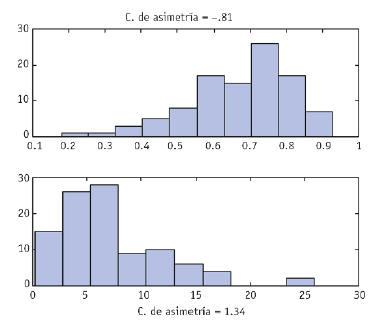



**Kurtosis** es una característica de como la frecuencia relativa se reparte entre el centro y los extremos


$$CA_p=\frac{\sum_{i=1}^n (x_i -\bar{x})^4}{ns^4}$$

Este coeficiente es siempre mayor
o igual que uno. El coeficiente de curtosis es importante porque nos informa respecto a la heterogeneidad de la distribución.

1. Si es muy bajo (menor de 2), indica una distribución mezclada
2. si es muy alto (mayor de 6), indica
la presencia de valores extremos atípicos.


In [ ]:
scipy.stats.skew(monthly_accidents) # Calcular el CA

-1.160513548007565

In [ ]:
scipy.stats.kurtosis(monthly_accidents) # Calcular el CA_p

1.140580420470969

(array([1., 0., 0., 2., 1., 1., 3., 2., 7., 3.]),
 array([ 8466. ,  8963.2,  9460.4,  9957.6, 10454.8, 10952. , 11449.2,
        11946.4, 12443.6, 12940.8, 13438. ]),
 <a list of 10 Patch objects>)

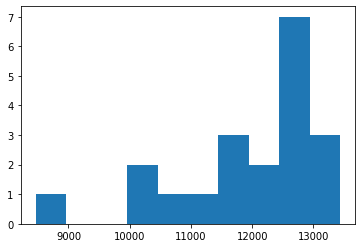

In [ ]:
plt.hist(monthly_accidents)

# **Otros graficos**

In [ ]:
df_prueba=df[['DATE','BOROUGH']]
pie_borough = df_prueba.groupby('BOROUGH').agg('count')
pie_borough=pie_borough.rename(columns={'DATE': 'Frecuencia'})
pie_borough

,Frecuencia
BOROUGH,
BRONX,37709
BROOKLYN,76253
MANHATTAN,48749
QUEENS,67120
STATEN ISLAND,8691


Index(['BRONX', 'BROOKLYN', 'MANHATTAN', 'QUEENS', 'STATEN ISLAND'], dtype='object', name='BOROUGH')


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning:

Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.



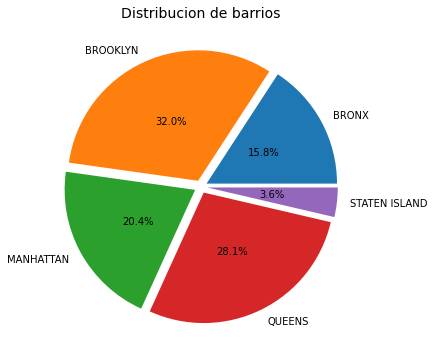

In [ ]:
labels = pie_borough.index
print(labels)
pie, ax = plt.subplots(figsize=[10,6])
fig=plt.pie(x=pie_borough, autopct="%.1f%%",labels=labels,explode=[0.05]*5,\
            pctdistance=0.5)
plt.title("Distribucion de barrios", fontsize=14);


In [ ]:
pie_borough

,Frecuencia
BOROUGH,
BRONX,37709
BROOKLYN,76253
MANHATTAN,48749
QUEENS,67120
STATEN ISLAND,8691


## **Facetgrid**

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning:

Using the barplot function without specifying `order` is likely to produce an incorrect plot.



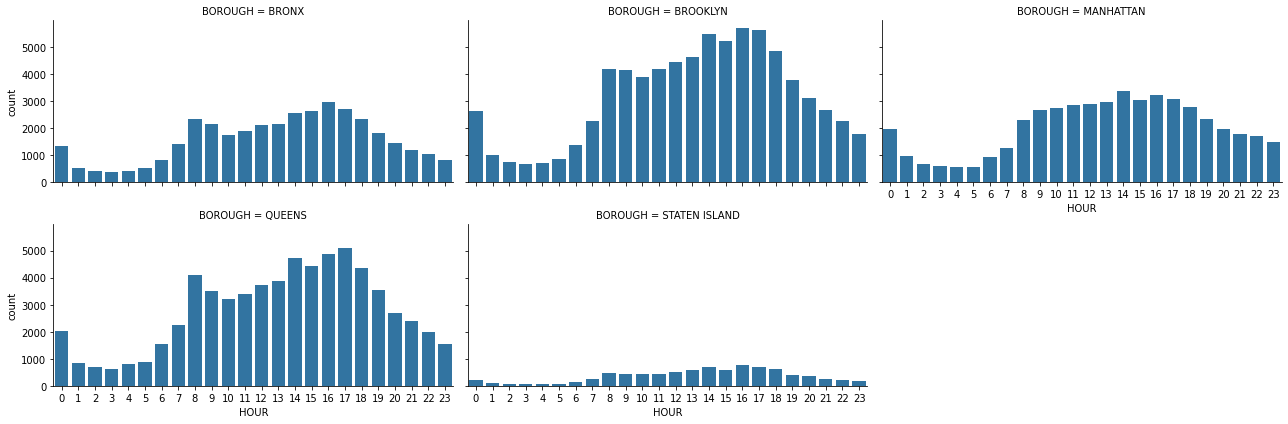

In [ ]:
df['TIME']=pd.to_datetime(df['TIME'])
df['HOUR'] = df['TIME'].dt.hour

df1 = pd.DataFrame({'count': df.groupby(['BOROUGH', 'HOUR']).size()})
df1
df1 = df1.reset_index()
df1.head(10)

df1 = pd.DataFrame({'count': df.groupby(['BOROUGH', 'HOUR']).size()})
df1 = df1.reset_index()
chart = sns.FacetGrid(df1, col='BOROUGH', margin_titles=True, col_wrap=3, aspect=2, row_order=df['BOROUGH'].unique)
chart.map(sns.barplot, 'HOUR', 'count',)

##**Plotly**

In [ ]:
import plotly.express as px
fig = px.pie(pie_borough, values='Frecuencia', \
             names=pie_borough.index, title='Piechart Boroughs')
fig.show()

In [ ]:
import plotly.express as px
fig = px.pie(pie_borough, values='Frecuencia', \
             names=pie_borough.index, title='Piechart Boroughs')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

# **Datos atipicos**



Es muy frecuente que los datos presenten observaciones que contienen
errores de medida o de transcripción o que son heterogéneas con el resto
porque se han obtenido en circunstancias distintas. Llamaremos datos atípicos
a estas observaciones generadas de forma distinta al resto de los datos.


De muchos estudios se ha demostrado que esta proporcion puede variar entre un 1 y un 3% de una muestra. Incluso puede ser >5% si no hay cuidado en la recoleccion

**Como detectarlos?**

1. Un criterio simple es observaciones alejadas de la media más de
tres desviaciones típicas. Debido a que entre la media y tres desviaciones típicas debe estar al menos el 89%
de los datos. Un problema con esta regla es que si existen varios valores atípicos
muy grandes que distorsionan la media y la desviación típica, es posible
que los datos atípicos no sean identificados

2. Una regla mejor es utilizar valores de centralización y dispersión
que estén poco afectados por valores atípicos, como la mediana y la Meda, pero presenta el inconveniente de no tener en cuenta la asimetría de la distribución

$$x > Med \pm 4.5*MEDA$$

3. Usando el rango intercuartilico

$$x < Q_1 -1.5 IQR$$
$$x > Q_3 +1.5 IQR$$

$\color{red}{\textbf{OJO:}}$ **no siempre se deben eleminar los datos atipicos, a veces estos datos dicen mucho en un analisis descriptivo**

Para detectar atipicos se suele usar el **diagrama de caja o boxplot**

Text(0.5, 0, 'Accidentes')

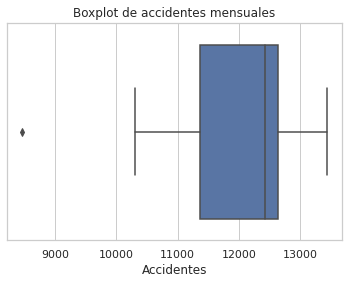

In [ ]:
import seaborn as sns
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=monthly_accidents)
plt.title('Boxplot de accidentes mensuales')
plt.xlabel('Accidentes')

# **Actividad 2**

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


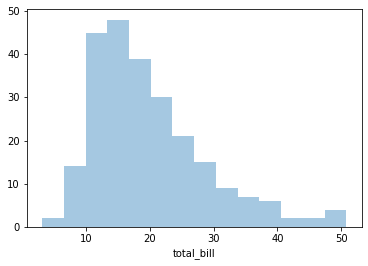

In [ ]:
sns.distplot(tips['total_bill'], kde=False)
plt.show()

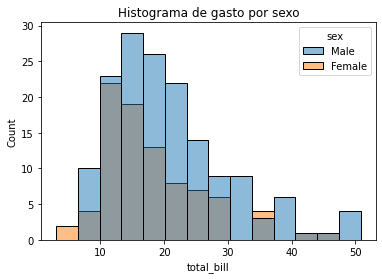

In [ ]:
sns.histplot(data=tips,x='total_bill',hue='sex')
plt.title('Histograma de gasto por sexo')
plt.show()

In [ ]:
import plotly.express as px
df = px.data.tips()
fig = px.histogram(df, x="total_bill", nbins=10)
fig.update_layout(
    title="Comportamiento de total_bill",
    xaxis=dict(
        showgrid=False,
        showline=True,
        linecolor='rgb(102, 102, 102)',
        tickfont_color='rgb(102, 102, 102)',
        showticklabels=True,
        dtick=10,
        ticks='outside',
        tickcolor='rgb(102, 102, 102)',
    ),
    margin=dict(l=140, r=40, b=50, t=80),
    legend=dict(
        font_size=10,
        yanchor='middle',
        xanchor='right',
    ),
    width=800,
    height=600,
    paper_bgcolor='white',
    plot_bgcolor='white',
    hovermode='closest',
)

## **Box plot**

In [ ]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Text(0.5, 0, 'Accidentes')

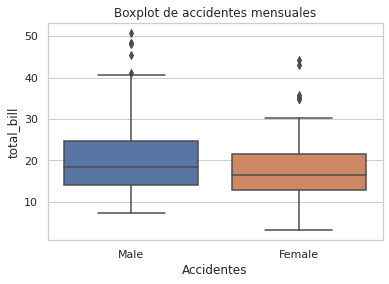

In [ ]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(y=tips.total_bill, x=tips.sex)
plt.title('Boxplot de accidentes mensuales')
plt.xlabel('Accidentes')

In [ ]:
import plotly.express as px
fig = px.box(tips, x="sex", y="total_bill")
fig.show()

In [ ]:
fig = px.box(tips, x="day", y="total_bill", color="smoker")
fig.show()

# **Imputación de Nulos**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
url='https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv'
df_cero= pd.read_csv(url,sep=',', header=None)

In [ ]:
df_cero

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
df_nan = df_cero.replace(0, np.nan)

In [ ]:
df_nan

,0,1,2,3,4,5,6,7,8
0,6.0,148.0,72.0,35.0,NaN,33.6,0.627,50,1.0
1,1.0,85.0,66.0,29.0,NaN,26.6,0.351,31,NaN
2,8.0,183.0,64.0,NaN,NaN,23.3,0.672,32,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,NaN
4,NaN,137.0,40.0,35.0,168.0,43.1,2.288,33,1.0
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63,NaN
764,2.0,122.0,70.0,27.0,NaN,36.8,0.340,27,NaN
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30,NaN
766,1.0,126.0,60.0,NaN,NaN,30.1,0.349,47,1.0


(array([[657.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [ 67., 625.,  71.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [621., 112.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [540.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [113., 155.,  70.,  30.,   8.,   9.,   5.,   1.,   2.,   1.],
        [757.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [768.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [768.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [268.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]]),
 array([7.800000e-02, 8.467020e+01, 1.692624e+02, 2.538546e+02,
        3.384468e+02, 4.230390e+02, 5.076312e+02, 5.922234e+02,
        6.768156e+02, 7.614078e+02, 8.460000e+02]),
 <a list of 9 BarContainer objects>)

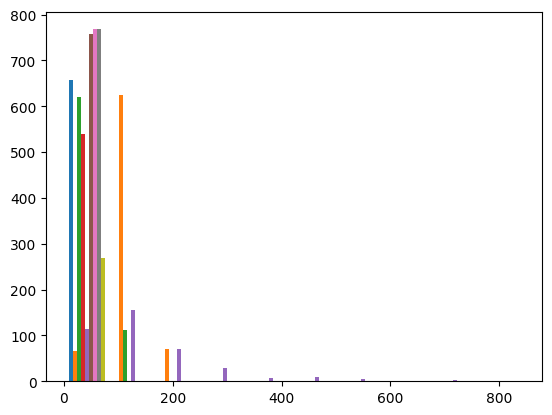

In [ ]:
plt.hist(df_nan)

In [ ]:
# reemplazar con la media
df_nan.fillna(df_nan.mean(), inplace=True)
df_nan.shape

(768, 9)

In [ ]:
df_nan.head().round(2)

,0,1,2,3,4,5,6,7,8
0,6.00,148.0,72.0,35.00,155.55,33.6,0.63,50,1.0
1,1.00,85.0,66.0,29.00,155.55,26.6,0.35,31,1.0
2,8.00,183.0,64.0,29.15,155.55,23.3,0.67,32,1.0
3,1.00,89.0,66.0,23.00,94.00,28.1,0.17,21,1.0
4,4.49,137.0,40.0,35.00,168.00,43.1,2.29,33,1.0


(array([[768.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [ 67., 630.,  71.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [656., 112.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [767.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [113., 529.,  70.,  30.,   8.,   9.,   5.,   1.,   2.,   1.],
        [768.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [768.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [768.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [768.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]]),
 array([7.800000e-02, 8.467020e+01, 1.692624e+02, 2.538546e+02,
        3.384468e+02, 4.230390e+02, 5.076312e+02, 5.922234e+02,
        6.768156e+02, 7.614078e+02, 8.460000e+02]),
 <a list of 9 BarContainer objects>)

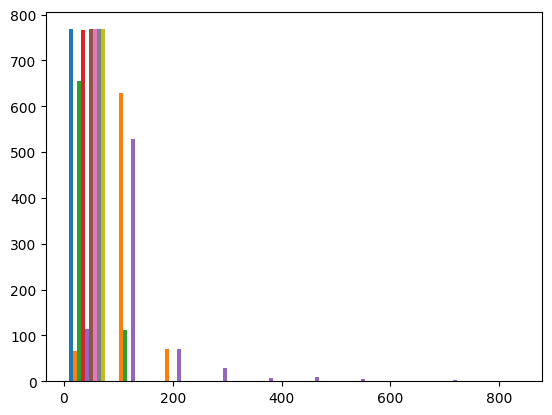

In [ ]:
plt.hist(df_nan)